Copyright 2020 Dale Bowman, Tasha Sahr, Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Intro to AI/ML

![](https://pbs.twimg.com/media/GPvO80iWAAAkvK9?format=jpg&name=medium)

![](https://pbs.twimg.com/media/GPvO7sMXQAAUOTD?format=jpg&name=medium)

![](https://pbs.twimg.com/media/GPvO4waWkAAI2Cn?format=jpg&name=medium)

# Clustering

In [7]:
import pandas as pd
dta_crimes = pd.read_csv('https://raw.githubusercontent.com/lbarbozaum/datasets/main/crime.csv',index_col='City')
dta_crimes

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft
City,,,,,,,
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13.0,35.7,477,220,1566,1183,788


In [11]:
import plotly.express as px
px.scatter(dta_crimes,x='Murder',y='Rape')

The goal of cluster analysis is to search for patterns in a data set by grouping the observations into clusters.
In a good clustering, objects within clusters are similar and items in different clusters are dissimilar.
For a data set with many features, we would like to use many relevant features to cluster the data.
This makes clustering a type of <span><em>multivariate</em></span> analysis.
Our variables are now a <span><strong>set</strong></span> of features, called <span><em>vectors</em></span>, that we will use to uncover latent structure in the data set.
In cluster analysis we are looking for potential clusters (groups) that may (or may not) exist in the population.

## What you will learn

In the sections that follow you will learn about clustering and how clustering can help you find patterns in your data that you may not know exist.  
We will study the following:

- Hierarchical clustering
- K-means clustering

## When to use clustering

Clustering is a multivariate technique that is useful when you want to use all relevant variables and observations to find patterns in the data.  
In this way, we can find potential natural groupings that may (or may not) exist in the data.

## Distance Measures

Let $\mathbf{X}_i = (X_{1i}, X_{2i}, \ldots, X_{pi})^\prime$ be the $i$th observation vector.
Whatever method of clustering we use, we must have some measure of similarity or dissimilarity in order to measure how close these multivariate measures are.
One measure typically used is the simple Euclidean distance between two observations.
The Euclidean distance between two $p$-dimensional observations, where $p$ is the number of features (variables) is

$$d(\mathbf{X}_i,\mathbf{X}_j) = \sqrt{(\mathbf{X}_i-\mathbf{X}_j)^\prime(\mathbf{X}_i-\mathbf{X}_j)} = \sqrt{\sum_{k=1}^{p} (X_{ki} - X_{kj}^2)}$$

## Hierarchical Clustering

Suppose we have $n$ observation vectors each consisting of $p$ different features.
In hierarchical clustering we start with $n$ clusters (one for each observation).
At each step one cluster is absorbed into another, ending up with only one cluster.
This method is not based on a probability model but is a data analysis technique.
It is an attempt to be computationally efficient instead of looking at all possible ways of partitioning $n$ items into $g$ groups which is approximately $\frac{g^n}{g!}$.
Even for moderate $g$ and $n$ this number is computationally prohibitive.
Once an item enters a cluster it can not be removed from that cluster in the hierarchical method.
This process can also be done in reverse by starting with one cluster and splitting one cluster into two groups at each step until the final step results in $n$ groups.

_Agglomerative_ methods start with $n$ clusters and combine clusters at each step.
The number of clusters shrinks and the clusters grow larger.
_Divisive_ methods start with one cluster and at each step partition one cluster into two clusters, ending with $n$ clusters.
For each approach, a decision must be made as to the optimal number of clusters.
Often the appropriate number of clusters can be found by inspecting dendrograms.
Figure 1 below shows a dendrogram of an agglomerative hierarchical clustering of statistics on assault, murder, and rape in each of the 50 US states in 1973.
It shows the order in which the clusters are combined based on the level of the bar connecting them.
The lower the level, the earlier the two clusters are combined.
A horizontal line cutting through the dendrogram can be used to determine the number of clusters.
For example, if a horizontal line were drawn at 6 on the vertical scale you would have 4 clusters.

In hierarchical clustering, at each step the distance between every two clusters is computed and the two closest clusters are combined.
There are several options for defining the distance between clusters and each one can give slightly different clusters.



![image.png](https://pbs.twimg.com/media/GPv6n9eXoAAE_a2?format=png&name=medium)

<center><b>Figure 1</b></center>
<!-- __Figure 1__ -->
<!-- <body>
    <div class="img-box">
        <img src="images/den-1.jpg" alt="img1" style="width:100%" />
    </div>
</body> -->

### Example: Hierarchical Clustering

The data in the table below are based on crime rates per 100,000 population for certain US cities.

<table>
<thead>
<tr class="header">
<th align="left">City</th>
<th align="right">Murder</th>
<th align="right">Rape</th>
<th align="right">Robbery</th>
<th align="right">Assault</th>
<th align="right">Burglary</th>
<th align="right">Larceny</th>
<th align="right">Auto Theft</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">Atlanta</td>
<td align="right">16.5</td>
<td align="right">24.8</td>
<td align="right">106</td>
<td align="right">147</td>
<td align="right">1112</td>
<td align="right">905</td>
<td align="right">494</td>
</tr>
<tr class="even">
<td align="left">Boston</td>
<td align="right">4.2</td>
<td align="right">13.3</td>
<td align="right">122</td>
<td align="right">90</td>
<td align="right">982</td>
<td align="right">669</td>
<td align="right">954</td>
</tr>
<tr class="odd">
<td align="left">Chicago</td>
<td align="right">11.6</td>
<td align="right">24.7</td>
<td align="right">340</td>
<td align="right">242</td>
<td align="right">808</td>
<td align="right">609</td>
<td align="right">645</td>
</tr>
<tr class="even">
<td align="left">Dallas</td>
<td align="right">18.1</td>
<td align="right">34.2</td>
<td align="right">184</td>
<td align="right">293</td>
<td align="right">1668</td>
<td align="right">901</td>
<td align="right">602</td>
</tr>
<tr class="odd">
<td align="left">Denver</td>
<td align="right">6.9</td>
<td align="right">41.5</td>
<td align="right">173</td>
<td align="right">191</td>
<td align="right">1534</td>
<td align="right">1368</td>
<td align="right">780</td>
</tr>
<tr class="even">
<td align="left">Detroit</td>
<td align="right">13.0</td>
<td align="right">35.7</td>
<td align="right">477</td>
<td align="right">220</td>
<td align="right">1566</td>
<td align="right">1183</td>
<td align="right">788</td>
</tr>
</tbody>
</table>

At each step in the clustering, we will compute a distance matrix $\mathbf{D}$.
For the first step, the distance between each pair of cities is computed using Euclidean distance to get the distance matrix below.

<table>
<thead>
<tr class="header">
<th align="left">City</th>
<th align="right">Atlanta</th>
<th align="right">Boston</th>
<th align="right">Chicago</th>
<th align="right">Dallas</th>
<th align="right">Denver</th>
<th align="right">Detroit</th>
</tr>
</thead>
<tbody>
<tr class="odd">
    <td align="left"><b>Atlanta</b></td>
<td align="right">0</td>
<td align="right">536.6</td>
<td align="right">516.4</td>
<td align="right">590.2</td>
<td align="right">693.6</td>
<td align="right">716.2</td>
</tr>
<tr class="even">
<td align="left"><b>Boston</b></td>
<td align="right">536.6</td>
<td align="right">0</td>
<td align="right">447.4</td>
<td align="right">833.1</td>
<td align="right">915.0</td>
<td align="right">881.1</td>
</tr>
<tr class="odd">
<td align="left"><b>Chicago</b></td>
<td align="right">516.4</td>
<td align="right">447.4</td>
<td align="right">0</td>
<td align="right">924.0</td>
<td align="right">1073.4</td>
<td align="right">971.5</td>
</tr>
<tr class="even">
<td align="left"><b>Dallas</b></td>
<td align="right">590.2</td>
<td align="right">833.1</td>
<td align="right">924.0</td>
<td align="right">0</td>
<td align="right">527.7</td>
<td align="right">464.5</td>
</tr>
<tr class="odd">
<td align="left"><b>Denver</b></td>
<td align="right">693.6</td>
<td align="right">915.0</td>
<td align="right">1073.4</td>
<td align="right">527.7</td>
<td align="right">0</td>
<td align="right"><font color="red"> 358.7 </font></td>
</tr>
<tr class="even">
<td align="left"><b>Detroit</b></td>
<td align="right">716.2</td>
<td align="right">881.1</td>
<td align="right">971.5</td>
<td align="right">464.5</td>
<td align="right"><font color="red"> 358.7 </font></td>
<td align="right">0</td>
</tr>
</tbody>
</table>

The smallest distance, <font color="red"> 358.7 </font>, is between Denver and Detroit.
These two cities are joined to form cluster $C_1 = \{\text{Denver},\text{Detroit}\}$.
Next we will define a distance matrix between all cities and $C_1$.
For this we need to define what we mean by the distance between clusters.
Here we will use the _single linkage_ also known as nearest neighbor method, where the distance between two clusters $A$ and $B$ is defined as:

$D(A,B) = \text{ minimum Euclidean distance between members in } A \text{ and members in } B$.

Using this method we get the following distance matrix.

<table>
<thead>
<tr class="header">
<th align="left">Cluster</th>
<th align="right">Atlanta</th>
<th align="right">Boston</th>
<th align="right">Chicago</th>
<th align="right">Dallas</th>
<th align="right">$\mathbf{C_1}$</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left"><b>Atlanta</b></td>
<td align="right">0</td>
<td align="right">536.6</td>
<td align="right">516.4</td>
<td align="right">590.2</td>
<td align="right"><font color="blue"> 693.6 </font></td>
</tr>
<tr class="even">
<td align="left"><b>Boston</b></td>
<td align="right">536.3</td>
<td align="right">0</td>
<td align="right"><font color="red"> 447.4 </font></td>
<td align="right">833.1</td>
<td align="right"><font color="blue"> 881.1 </font></td>
</tr>
<tr class="odd">
<td align="left"><b>Chicago</b></td>
<td align="right">516.4</td>
<td align="right"><font color="red"> 447.4 </font></td>
<td align="right">0</td>
<td align="right">924.0</td>
<td align="right"><font color="blue"> 971.5 </font></td>
</tr>
<tr class="even">
    <td align="left"><b>Dallas</b></td>
<td align="right">590.2</td>
<td align="right">833.1</td>
<td align="right">924.0</td>
<td align="right">0</td>
<td align="right"><font color="blue"> 464.5 </font></td>
</tr>
<tr class="odd">
<td align="left">$\mathbf{C_1}$</td>
    <td align="right"><font color="blue"> 693.6 </font></td>
<td align="right"><font color="blue"> 881.1 </font></td>
<td align="right"><font color="blue"> 971.5 </font></td>
<td align="right"><font color="blue"> 464.5 </font></td>
<td align="right">0</td>
</tr>
</tbody>
</table>

The distance from Atlanta to $C_1$ is <font color="blue"> 693.6 </font> since the distance from Atlanta to Denver is 693.6 and from Atlanta to Detroit is bigger at 716.2 and the minimum distance is chosen. The distance from Boston to $C_1$ is similarly found: from Boston to Denver is 915.0 and from Boston to Detroit is 881.1. The numbers in blue in the distance matrix are the minimum from each city to Denver or Detroit. The smallest distance in the new matrix is between Boston and Chicago and so these are merged into $C_2 = \{\text{Boston}, \text{Chicago}\}$.

The next distance matrix then becomes

<table>
<thead>
<tr class="header">
<th align="left">Cluster</th>
<th align="right">Atlanta</th>
<th align="right"><span class="math inline">$\mathbf{C_2}$</th>
<th align="right">Dallas</th>
<th align="right"><span class="math inline">$\mathbf{C_1}$</th>
</tr>
</thead>
<tbody>
<tr class="odd">
    <td align="left"><b>Atlanta</b></td>
<td align="right">0</td>
<td align="right">516.4</td>
<td align="right">590.2</td>
<td align="right">693.6</td>
</tr>
<tr class="even">
<td align="left"><span class="math inline">$\mathbf{C_2}$</td>
<td align="right">516.4</td>
<td align="right">0</td>
<td align="right">833.1</td>
<td align="right">881.1</td>
</tr>
<tr class="odd">
    <td align="left"><b>Dallas</b></td>
<td align="right">590.2</td>
<td align="right">833.1</td>
<td align="right">0</td>
<td align="right"><font color="red"> 464.5 </font></td>
</tr>
<tr class="even">
<td align="left"><span class="math inline">$\mathbf{C_1}$</td>
<td align="right">693.1</td>
<td align="right">881.1</td>
<td align="right"><font color="red"> 464.5 </font></td>
<td align="right">0</td>
</tr>
</tbody>
</table>

Now the smallest distance is <font color="red"> 464.5 </font> between Dallas and $C_1$, so the new cluster formed is $C_3 = \{\text{Dallas}, C_1\}$. The new distance matrix is now the one below.

<table>
<thead>
<tr class="header">
<th align="left">Cluster</th>
<th align="right">Atlanta</th>
<th align="right">$\mathbf{C_2}$</th>
<th align="right">$\mathbf{C_3}$</th>
</tr>
</thead>
<tbody>
<tr class="odd">
    <td align="left"><b>Atlanta</b></td>
<td align="right">0</td>
<td align="right"><font color="red"> 516.4 </font></td>
<td align="right">590.2</td>
</tr>
<tr class="even">
<td align="left">$\mathbf{C_2}$</td>
<td align="right"><font color="red"> 516.4 </font></td>
<td align="right">0</td>
<td align="right">833.1</td>
</tr>
<tr class="odd">
<td align="left">$\mathbf{C_3}$</td>
<td align="right">590.2</td>
<td align="right">833.1</td>
<td align="right">0</td>
</tr>
</tbody>
</table>

We combine Atlanta and $C_2$ since the distance between them is the smallest. The newly created cluster is $C_4 = \{\text{Atlanta},C_2\}$.

The final distance matrix is then

<table>
<thead>
<tr class="header">
<th align="left">Cluster</th>
<th align="right">$\mathbf{C_4}$</th>
<th align="right">$\mathbf{C_3}$</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">$\mathbf{C_4}$</td>
<td align="right">0</td>
    <td align="right"><font color="red"> 590.2 </font></td>
</tr>
<tr class="even">
<td align="left">$\mathbf{C_3}$</td>
<td align="right"><font color="red"> 590.2 </font></td>
<td align="right">0</td>
</tr>
</tbody>
</table>

The final cluster is then $C_5 = \{C_3,C_4\}$.
The dendrogram for this clustering is shown in Figure 2 below.
The bar where two clusters are joined is at the level equal to the distance between them.

![cluster2.png](https://pbs.twimg.com/media/GPv6meoWMAAC7IK?format=png&name=large)

<center><b>Figure 2</b></center>

### Programming Example

The `crime.csv` dataset contains the following 8 variables:


| Variable   | Type    | Description                              |
|:------------|:---------|:------------------------------------------|
| City       | Nominal | US City                                  |
| Murder     | Ratio   | number of murders per 100,000 people     |
| Rape       | Ratio   | number of rapes per 100,000 people       |
| Robbery    | Ratio   | number of robberies per 100,000 people   |
| Assault    | Ratio   | number of assaults per 100,000 people     |
| Burglary   | Ratio   | number of burglaries per 100,000 people  |
| Larceny    | Ratio   | number of larcenies per 100,000 people   |
| Auto Theft | Ratio   | number of auto thefts per 100,000 people |
|            |         |                                          |

Since each city is only listed once, `City` isn't a predictor - it is an identifier (ID).
Anytime you have a variable that never repeats a value, you should consider it to be some kind of identifier.

<!-- Import `pandas` as `pd`. Use the function `read_csv` in `pandas` to read in the `crime.csv` dataset and name it `dta_crime`.

__Note__: The variable names are found in the file and the first column is the index column (`index_col=0`). -->

To load the data into a dataframe, we need to import `pandas`:

- `import pandas as pd`

In [ ]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="cln2y5W-Js_!Lv!XvfTs">pd</variable></variables><block type="importAs_Python" id="`b|$cw8I5+yMtL$JgH{E" x="45" y="-2"><field name="libraryName">pandas</field><field name="libraryAlias" id="cln2y5W-Js_!Lv!XvfTs">pd</field></block></xml>

To load the data using `City` is an ID:
    
- Set `dta_crime` to with `pd` do `read_csv` using`
    - `"datasets/crime.csv"`
    - freestyle `index_col="City"` **(`pandas` calls IDs *indexes*)**
- `dta_crime` (for display)

**We need `index_col` to tell pandas that `City` is an ID column, not a data column**

In [ ]:
dta_crime = pd.read_csv('datasets/crime.csv',index_col="City")


print(dta_crime)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="%=I(Y@y7)V7$byL5_`VZ">dta_crime</variable><variable id="cln2y5W-Js_!Lv!XvfTs">pd</variable></variables><block type="variables_set" id="dR[!N@Ole5JbG,tQItg*" x="23" y="49"><field name="VAR" id="%=I(Y@y7)V7$byL5_`VZ">dta_crime</field><value name="VALUE"><block type="varDoMethod_Python" id="^GxByOuGAW:k[M)2o;~?"><mutation items="2"></mutation><field name="VAR" id="cln2y5W-Js_!Lv!XvfTs">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="Fdcd[^}s=DmP)S`e8Ycs"><field name="TEXT">datasets/crime.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="g}XD+gJt2R|3*(r_eOIR"><field name="CODE">index_col="City"</field></block></value></block></value><next><block type="text_print" id="$u~e]lh)`BNOTE^Y-U{N"><value name="TEXT"><shadow type="text" id="x-aa+9x~O/[WJ1{E!]uM"><field name="TEXT">abc</field></shadow><block type="variables_get" id="x_2{5`$R3P+C7#:VJ=zL"><field name="VAR" id="%=I(Y@y7)V7$byL5_`VZ">dta_crime</field></block></value></block></next></block></xml>

         Murder  Rape  Robbery  Assault  Burglary  Larceny  Auto Theft
City                                                                  
Atlanta    16.5  24.8      106      147      1112      905         494
Boston      4.2  13.3      122       90       982      669         954
Chicago    11.6  24.7      340      242       808      609         645
Dallas     18.1  34.2      184      293      1668      901         602
Denver      6.9  41.5      173      191      1534     1368         780
Detroit    13.0  35.7      477      220      1566     1183         788


In [ ]:
def calc(f,a):
    return f(a)


In [ ]:
def pwr(x):
    return x*x
calc(pwr,11)

121

In [ ]:
calc(lambda x:x*x,11)

121

We have a couple of different options here for clustering:

- Create a distance matrix ourselves, then iteratively update it as in the example above to produce clusters (`squareform(pdist(dta_crime))`)
- Use a python library that iterates over the dataframe to make clusters (` linkage(dta_crime, 'single')`)
- Use `plotly` to both compute the clusters and draw them for us at the same time

The last option with `plotly` seems the best, but we need to introduce one concept first, **lambda functions**.

A lambda function is just an anonymous function.
So now we just need to explain what a function is!

You've seen functions before in math class.
A common example is $f(x) = x + 1$.
$f$ is a function, and when we give it an $x$, it gives us back a number that is $x+1$.

In programming, functions are very similar, but you can give them non-numbers and get back non-numbers.
You can also give them many things at the same time and get back many things at the same time.
In fact, we've been using functions all along - when you do `with pd do read_csv using` you are calling the function `read_csv` and giving it whatever is in `using` (normally the name of the data file).

What we *haven't* done up to this point is create a function ourselves.
Fortunately, lamba functions look a lot like the math functions you are familiar with:

`lambda x : x + 1`

is the same as

$f(x) = x + 1$

Notice we replaced $f(x) =$ with `lambda x :`.
Everything else is the same.

Let's use `plotly` with a lambda function!

First, the imports:

- `import plotly.figure_factory as ff`
- `from scipy.cluster.hierarchy import linkage`

**Notice the second import is a different kind, but you rarely want to do it this way with Blockly.**

In [ ]:
from scipy.cluster.hierarchy import linkage
import plotly.figure_factory as ff

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~w_#2L;73`MvL%o{Aauj">linkage</variable><variable id="Zj7)98L%$3=^m0RFTpsE">ff</variable></variables><block type="importFrom_Python" id="9:j_C?]Q#q4=)28[tKRp" x="52" y="29"><field name="libraryName">scipy.cluster.hierarchy</field><field name="libraryAlias" id="~w_#2L;73`MvL%o{Aauj">linkage</field><next><block type="importAs_Python" id="s^jIajxkso0HJgdi=?L."><field name="libraryName">plotly.figure_factory</field><field name="libraryAlias" id="Zj7)98L%$3=^m0RFTpsE">ff</field></block></next></block></xml>

Now let's use the `create_dendrogram` function in `plotly.figure_factory`:

- with `ff` do `create_dendrogram` using
    - `dta_crime`
    - freestyle `labels=dta_crime.index` (so our labels are cities)
    - freestyle `linkagefun=lambda x: linkage(dta_crime, 'single', metric='euclidean')` (the linkage function, which is single linkage with Euclidean distance)
  

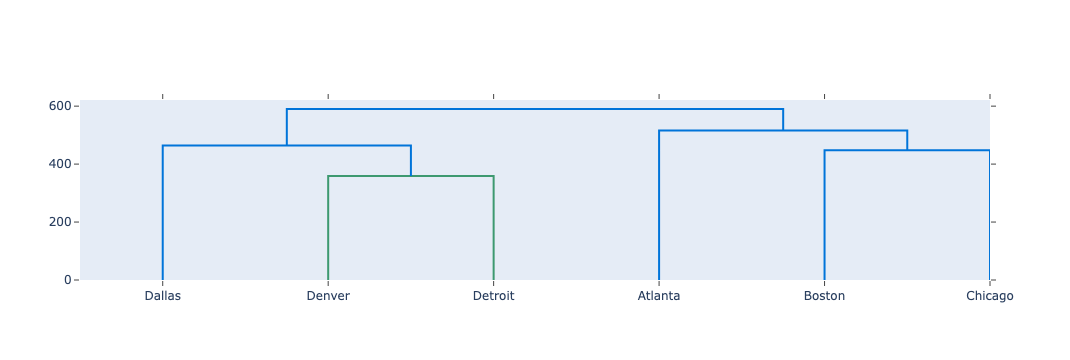

In [ ]:
ff.create_dendrogram(dta_crime,labels=dta_crime.index,linkagefun=lambda x: linkage(dta_crime, 'single', metric='euclidean'))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Zj7)98L%$3=^m0RFTpsE">ff</variable><variable id="%=I(Y@y7)V7$byL5_`VZ">dta_crime</variable></variables><block type="varDoMethod_Python" id="oPiAt8f{1]~Pb4{GzW3s" x="37" y="111"><mutation items="3"></mutation><field name="VAR" id="Zj7)98L%$3=^m0RFTpsE">ff</field><field name="MEMBER">create_dendrogram</field><data>ff:create_dendrogram</data><value name="ADD0"><block type="variables_get" id="YQ7_-p5-u5W8*57;dz0L"><field name="VAR" id="%=I(Y@y7)V7$byL5_`VZ">dta_crime</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="e-55{^^Nd+o:2CkC#g_U"><field name="CODE">labels=dta_crime.index</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="eWv5E1j;ofN~wc%Y~8]x"><field name="CODE">linkagefun=lambda x: linkage(dta_crime, 'single', metric='euclidean')</field></block></value></block></xml>

Congratulations, you have just entered the world of Machine Learning!

This was your first unsupervised clustering method.

## Nonhierarchical Methods

### Partitioning

_Partitioning_ methods are also called _optimization methods_.
In this approach to clustering, observations are separated into $g$ clusters and optimal clustering is chosen according to some criteria.
One partitioning method commonly used is _$k$-means_.

In $k$-means clustering, some initial $g$ observations are chosen as seeds.
Here $g$ is the number of clusters we want to use.
The seeds are typically chosen at random so that they are a specified distance apart.
The remaining observations are assigned to the cluster whose seed they are closest to.
When all points (observation vectors) have been assigned, each point is re-examined to see if it is closer to the _centroid_ of any other cluster.
The centroid is the average, over all the observations in the cluster, of each of the $p$ features.
If points are closer to a centroid from a different cluster, they are moved to that cluster.
Centroids are re-calculated and the process continues until there is no further improvement.
If there is no convergence or slow convergence there may be no natural clustering in the data.
$k$-means requires that the number of clusters be specified in advance but it allows observations to move between clusters if a better clustering is found.
Like hierarchical clustering, $k$-means is not based on probability measures.

The `iris.csv` dataset contains 5 variables:

| Variable    | Type    | Description           |
|:-------------|:---------|:-----------------------|
| SepalLength | Ratio   | the sepal length (cm) |
| SepalWidth  | Ratio   | the sepal width (cm)  |
| PetalLength | Ratio   | the petal length (cm) |
| PetalWidth  | Ratio   | the petal width (cm)  |
| Species     | Nominal | the flower species    |

<div style="text-align:center;font-size: smaller">
 <b>Source:</b> This dataset was taken from the <a href="https://archive.ics.uci.edu/ml/datasets/iris">UCI Machine Learning Repository library
    </a></div>
<br>

Let's load the data:

- Set `dta_iris` to with `pd` do `read_csv` using
    - `"datasets/iris.csv"`
- `dta_iris` (to display)


In [ ]:
dta_iris = pd.read_csv('datasets/iris.csv')
print(dta_iris)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K-$W3`yn;-;t/nG`(JNB">dta_iris</variable><variable id="cln2y5W-Js_!Lv!XvfTs">pd</variable></variables><block type="variables_set" id="o!_/v?m!yqQ,)E9Cu-oC" x="59" y="48"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field><value name="VALUE"><block type="varDoMethod_Python" id="8,(z!14KBrpq4=xO}:N@"><mutation items="1"></mutation><field name="VAR" id="cln2y5W-Js_!Lv!XvfTs">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="B[_;hLna,A,(AYu;V+W~"><field name="TEXT">datasets/iris.csv</field></block></value></block></value><next><block type="text_print" id="XpNUcZldqQ%GsvwDf8M$"><value name="TEXT"><shadow type="text" id="6T*=0SmUKG,:YGWzoRse"><field name="TEXT">abc</field></shadow><block type="variables_get" id="U{tjaPu*^u`Kaub;]=M-"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field></block></value></block></next></block></xml>

     SepalLength  SepalWidth  PetalLength  PetalWidth    Species
0            5.1         3.5          1.4         0.2     setosa
1            4.9         3.0          1.4         0.2     setosa
2            4.7         3.2          1.3         0.2     setosa
3            4.6         3.1          1.5         0.2     setosa
4            5.0         3.6          1.4         0.2     setosa
..           ...         ...          ...         ...        ...
145          6.7         3.0          5.2         2.3  virginica
146          6.3         2.5          5.0         1.9  virginica
147          6.5         3.0          5.2         2.0  virginica
148          6.2         3.4          5.4         2.3  virginica
149          5.9         3.0          5.1         1.8  virginica

[150 rows x 5 columns]


We are going to use `SepalLength`, `SepalWidth`, `PetalLength`, and `PetalWidth` to perform $k$-means.

Create a new dataframe with just these columns:

- Set `dta_iris` to `dta_iris [ ]` (In LISTS, get {dictVariable}[ ] and select dta_iris from the dropdown mentu)
- Put the following in a list, and put that *inside* `dta_iris [ ]`:
     - `"SepalLength"`
     - `"SepalWidth"`
     - `"PetalLength"`
     - `"PetalWidth"`
   
**Note that when we set `dta_iris` to this new dataframe, we are overwriting what was in the original one, so to get the original back we'd need to read from the csv file again.**

In [ ]:
dta_iris = dta_iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
print(dta_iris)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K-$W3`yn;-;t/nG`(JNB">dta_iris</variable></variables><block type="variables_set" id="=ig1nEv[UX52HrE_p{4|" x="64" y="251"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field><value name="VALUE"><block type="indexer_Python" id="3-_aiph}+wLzs=|dqi/p"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field><value name="INDEX"><block type="lists_create_with" id="}pHO6Rf_Z/8I!I)e)RkB"><mutation items="4"></mutation><value name="ADD0"><block type="text" id=")i4ow9ouZ6-Nn_A~Pe(1"><field name="TEXT">SepalLength</field></block></value><value name="ADD1"><block type="text" id="I1+21AjR7GN3h{XT{;Yq"><field name="TEXT">SepalWidth</field></block></value><value name="ADD2"><block type="text" id="|0kMt6ECCY|EF`NvPCs?"><field name="TEXT">PetalLength</field></block></value><value name="ADD3"><block type="text" id="K[V{2Wezi{*#T[!F`GY+"><field name="TEXT">PetalWidth</field></block></value></block></value></block></value><next><block type="text_print" id="LO.=K/_Ti0~^d{w*YeL2"><value name="TEXT"><shadow type="text" id="-x`*e)Q[/+ucks1OoQh/"><field name="TEXT">abc</field></shadow><block type="variables_get" id="*A$*IUg#@h`9){4Trp8D"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field></block></value></block></next></block></xml>

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]


To perform $k$-means, import `sklearn.cluster`:
<!-- import `KMeans`. We will need this function.  -->
- `import sklearn.cluster as cluster`

In [ ]:
import sklearn.cluster as cluster

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="bGjm_gSzX9jiirezZl]t">cluster</variable></variables><block type="importAs_Python" id="PY{U`k+/x^M%^eF6EGOT" x="47" y="7"><field name="libraryName">sklearn.cluster</field><field name="libraryAlias" id="bGjm_gSzX9jiirezZl]t">cluster</field></block></xml>

We will arbitrarily assign the number of clusters, $k$, as 5.
To implement $k$-means clustering:

- Set `kmeansModel` to with `cluster` create `KMeans` using
    - freestyle `n_clusters=5`

In [ ]:
kmeansModel = cluster.KMeans(n_clusters=5)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="WMF]U5@RAG#cC}tV6dwg">kmeansModel</variable><variable id="bGjm_gSzX9jiirezZl]t">cluster</variable></variables><block type="variables_set" id="d+Db*89YbRUtzKVlHrg_" x="38" y="38"><field name="VAR" id="WMF]U5@RAG#cC}tV6dwg">kmeansModel</field><value name="VALUE"><block type="varCreateObject_Python" id="`}8{Hos-tu_U/qXd5)2i"><mutation items="1"></mutation><field name="VAR" id="bGjm_gSzX9jiirezZl]t">cluster</field><field name="MEMBER">KMeans</field><data>cluster:KMeans</data><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="vnGv`ZV6W@.u[cSRo=6@"><field name="CODE">n_clusters=5</field></block></value></block></value></block></xml>

`kmeansModel` is our clustering model, but we haven't shown it any data yet, so right now it is blank/empty.
To get clusters, we need to *fit* the model with some data, then *predict* cluster membership for each datapoint (i.e. a row in our dataframe).
We can do both of these steps at once using the `fit_predict` function, storing the cluster prediction results in `predictions`:

- Set `predictions` to with `kmeansModel` do `fit_predict` using
    `dta_iris`
- `predictions` (to display)


In [ ]:
predicions = kmeansModel.fit_predict(dta_iris)
print(predicions)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Xf8%Kp/8#Dq7U)`K])#f">predicions</variable><variable id="WMF]U5@RAG#cC}tV6dwg">kmeansModel</variable><variable id="K-$W3`yn;-;t/nG`(JNB">dta_iris</variable></variables><block type="variables_set" id="BB2?-en4vY6;s@,==0+e" x="17" y="36"><field name="VAR" id="Xf8%Kp/8#Dq7U)`K])#f">predicions</field><value name="VALUE"><block type="varDoMethod_Python" id="!Lh_CEc#qpd{r4zZ.52D"><mutation items="1"></mutation><field name="VAR" id="WMF]U5@RAG#cC}tV6dwg">kmeansModel</field><field name="MEMBER">fit_predict</field><data>kmeansModel:fit_predict</data><value name="ADD0"><block type="variables_get" id="te4E3p/5B?t#k,u}1~3a"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field></block></value></block></value><next><block type="text_print" id="Pj-QXDQOu,:HIW8=D,sv"><value name="TEXT"><shadow type="text" id="+Elh55RB)G+H$b)F;xa."><field name="TEXT">abc</field></shadow><block type="variables_get" id="M`?R(}h!xVFXF$fgG4F?"><field name="VAR" id="Xf8%Kp/8#Dq7U)`K])#f">predicions</field></block></value></block></next></block></xml>

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 4 2 2 3 4 2 4 4 2 4 2 4 2 2 2 2 4 3 2 3 2
 2 2 3 3 2 4 4 4 4 3 2 2 3 2 2 4 2 2 4 4 2 2 2 2 4 2 1 3 1 3 1 1 4 1 1 1 3
 3 1 3 3 3 3 1 1 3 1 3 1 3 1 1 3 3 3 1 1 1 3 3 3 1 3 3 3 1 1 3 3 1 1 3 3 3
 3 3]


These are the cluster assignments to each flower, corresponding to each row of the dataset.

Let's take these cluster assignments and add them as a new column of `dta_iris`, calling that column `cluster`.
The following will *insert* this column at position 0 (the first position):

- with `dta_iris` do `insert` using
    - `0`
    - `"cluster"`
    - `with predictions do astype using` a freestyle containing `str`
- `dta_iris` (to display)

**We use `astype` to convert the predictions from `dtype=int32` to `str` (string) in order to group clusters by color in the plot later on.**

<!-- Note: the original presentation converted to pandas categorical type, which orders the plot legend, but introduces more concepts that seems appropriate at this stage -->

In [ ]:
dta_iris.insert(0,'cluster',predicions)

dta_iris

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K-$W3`yn;-;t/nG`(JNB">dta_iris</variable><variable id="Xf8%Kp/8#Dq7U)`K])#f">predicions</variable></variables><block type="varDoMethod_Python" id="!+WzsLhaHy/OS6:z34rV" x="70" y="153"><mutation items="3"></mutation><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field><field name="MEMBER">insert</field><data>dta_iris:insert</data><value name="ADD0"><block type="math_number" id="$,anX8;HYTMub09pi7Vk"><field name="NUM">0</field></block></value><value name="ADD1"><block type="text" id="E$YGXWi7SbBMTeSOYglI"><field name="TEXT">cluster</field></block></value><value name="ADD2"><block type="variables_get" id="E.tvtfRtW{=EV_kTDwHW"><field name="VAR" id="Xf8%Kp/8#Dq7U)`K])#f">predicions</field></block></value></block><block type="variables_get" id="iYt356i{5]c$HbPQTS1," x="154" y="398"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field></block></xml>

,cluster,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,3,6.7,3.0,5.2,2.3
146,3,6.3,2.5,5.0,1.9
147,3,6.5,3.0,5.2,2.0
148,3,6.2,3.4,5.4,2.3


We can now make plots using this new `cluster` variable.
Through this, we can show the power of clustering - to find important relationships in our data.

We are going to make a scatterplot of `SepalWidth` by `SepalLength`, but we'll color the points using their cluster memberships and also draw a trendline for each cluster.

First, import `plotly.express` to make the plot:

- `import plotly.express as px`

In [ ]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3XR/LXd[R:?-joQq2iX*">px</variable></variables><block type="importAs_Python" id="xqw`Iu+_cRa?s{o5fCmT" x="45" y="8"><field name="libraryName">plotly.express</field><field name="libraryAlias" id="3XR/LXd[R:?-joQq2iX*">px</field></block></xml>

Create the scatterplot *with ordinary least squares (ols) trendlines* to better show the relationship for each cluster:

- with `px` do `scatter` using
    - `dta_iris`
    - `x="SepalWidth"`
    - `y="SepalLength"`
    - `color="cluster"`
    - `trendline="ols"`
<!--     - `title_text="Relationship between Sepal Length and Sepal Width"` -->
    
**Note everything in the list is a freestyle block except the first item, which is a dataframe variable**

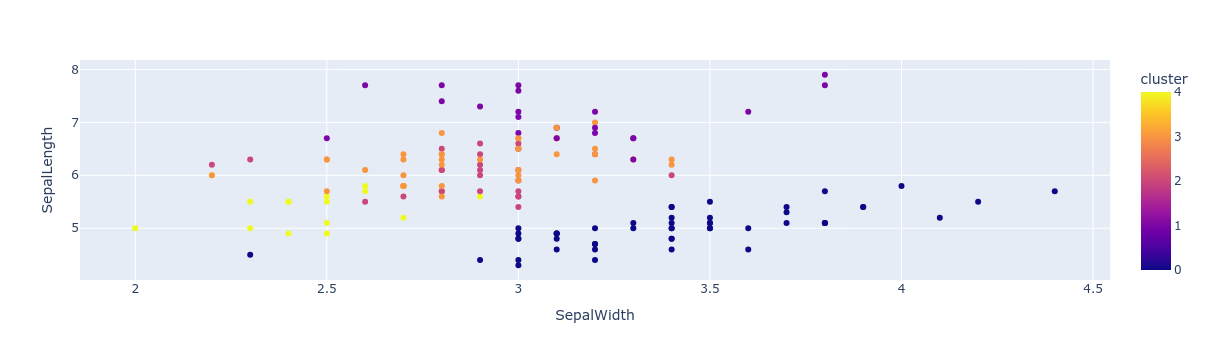

In [ ]:
px.scatter(dta_iris,'SepalWidth','SepalLength','cluster')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3XR/LXd[R:?-joQq2iX*">px</variable><variable id="K-$W3`yn;-;t/nG`(JNB">dta_iris</variable></variables><block type="varDoMethod_Python" id="Nh{Eg5F!2rJ$eXZ%*%6[" x="87" y="146"><mutation items="4"></mutation><field name="VAR" id="3XR/LXd[R:?-joQq2iX*">px</field><field name="MEMBER">scatter</field><data>px:scatter</data><value name="ADD0"><block type="variables_get" id="c*ub-3F_DY`H{d$0Kq/2"><field name="VAR" id="K-$W3`yn;-;t/nG`(JNB">dta_iris</field></block></value><value name="ADD1"><block type="text" id="aK`7UIcJd=U[I{XEu1!6"><field name="TEXT">SepalWidth</field></block></value><value name="ADD2"><block type="text" id="PAWmVeUG+kgf9Gtuo]!8"><field name="TEXT">SepalLength</field></block></value><value name="ADD3"><block type="text" id=",N[m39O3{bUB*Bk086$6"><field name="TEXT">cluster</field></block></value></block></xml>

How do we know we need the clusters?

- The cluster points (in different colors) are in different regions of the plot and mostly don't overlap

- The trendlines suggests that different clusters may have slightly different relationships between `SepalLength` and `SepalWidth`, as indicated by different slopes to these lines

### Choosing the number of clusters

Oftentimes there are suggestions from the domain of the problem that suggest an appropriate number of clusters, $g$.
In many instances however, we must make our own decisions about the __best__ value of $g$.
One method is to select a set of cluster sizes that may be appropriate and compare the clustering using sum of squares to see which value of $g$ gives the best clustering.
Ideally we would like the distances between observation vectors to be small inside each cluster and large across clusters.
We can evaluate these using within sum of squares matrices and between sum of squares matrices.
In an ideal clustering, the within SS matrix should be __small__ and the between SS matrix should be __large__.  
There are various measures we can use to assess the relative size of matrices, including the trace and determinant.


### Mixtures of Distributions

We can use probability models to perform clustering if we assume that there are $g$ multivariate normal distributions corresponding to the proposed $g$ clusters.
We want to assign each observation vector to the distribution that is most probable.
We assume that each observation vector $\mathbf{X}$ has a probability distribution given by the mixture:

$$h(\mathbf{X}) = \sum_{i=1}^g \alpha_i f_i(\mathbf{X}, \mathbf{\mu}_i, \mathbf{\Sigma}_i)$$
where $0 \le \alpha_i \le 1$ and $\displaystyle \sum_{i=1}^g \alpha_i = 1$.  

$f_i(\cdot)$ is a probability distribution usually assumed to be a multivariate normal distribution with mean vector $\mathbf{\mu}_i$ and covariance matrix $\mathbf{\Sigma}_i$.
We assign an observed vector to the cluster with highest posterior probability.

<!--  -->